In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
get_ipython().run_line_magic('matplotlib', 'inline')
%config InlineBackend.figure_format = 'svg'

In [2]:
path_runcontrol = Path('baserun')/ 'RunControl.nml'
df_state_init = sp.init_supy(path_runcontrol)
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

2020-06-16 08:53:34,704 - SuPy - INFO - All cache cleared.
2020-06-16 08:53:36,626 - SuPy - INFO - All cache cleared.


In [3]:
df_state_r = df_state_init.copy()
df_state_r.loc[:, ('sfr', '(1,)')] = .00 #Building
df_state_r.loc[:, ('sfr', '(4,)')] = 0.41 #Grass
df_state_r.popdensdaytime = 0
df_state_r.popdensnighttime = 0 
grid_r = df_state_r.index[0]
sp.check_state(df_state_r)

2020-06-16 08:53:41,906 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-16 08:53:42,078 - SuPy - INFO - All checks for `df_state` passed!


In [4]:
# Run SuPy initaial conditions
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init);
df_output_suews = df_output['SUEWS'];

# Run SuPy with modified environment add _r for recognition later on
df_r_output, df_state_r_final = sp.run_supy(df_forcing, df_state_r);
df_r_output_suews = df_r_output['SUEWS'];
df_r_output_suews = df_r_output_suews.add_suffix('_r');

2020-06-16 08:53:54,237 - SuPy - INFO - ====================
2020-06-16 08:53:54,237 - SuPy - INFO - Simulation period:
2020-06-16 08:53:54,237 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-16 08:53:54,252 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-16 08:53:54,252 - SuPy - INFO - 
2020-06-16 08:53:54,252 - SuPy - INFO - No. of grids: 1
2020-06-16 08:53:54,252 - SuPy - INFO - SuPy is running in serial mode
2020-06-16 08:54:43,601 - SuPy - INFO - Execution time: 49.4 s
2020-06-16 08:54:43,601 - SuPy - INFO - ====================

2020-06-16 08:54:43,601 - SuPy - INFO - ====================
2020-06-16 08:54:43,601 - SuPy - INFO - Simulation period:
2020-06-16 08:54:43,601 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-16 08:54:43,601 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-16 08:54:43,601 - SuPy - INFO - 
2020-06-16 08:54:43,601 - SuPy - INFO - No. of grids: 1
2020-06-16 08:54:43,601 - SuPy - INFO - SuPy is running in serial mode
2020-06-16 08:56:18,688 - S

In [5]:
df_output_solweig = df_output['SOLWEIG']
df_output_solweig_g = df_output_solweig.loc[grid]
df_merge_s = pd.concat([df_output_solweig_g],axis=1,join='inner')

In [7]:
# Merge to one dataframe for easier plotting
grid_r = df_state_r.index[0];
df_output_suews_g = df_output_suews.loc[grid];
df_r_output_suews_g = df_r_output_suews.loc[grid_r];
df_merge = pd.concat([df_output_suews_g, df_r_output_suews_g],axis=1,join='inner');

In [51]:
# Calculate diffrence between runs d=delta
df_merge['d_QN'] = df_merge['QN'] - df_merge['QN_r']
df_merge['d_QS'] = df_merge['QS'] - df_merge['QS_r']
df_merge['d_QE'] = df_merge['QE'] - df_merge['QE_r']
df_merge['d_QH'] = df_merge['QH'] - df_merge['QH_r']
df_merge['d_QF'] = df_merge['QF'] - df_merge['QF_r']
df_merge['d_RH2']= df_merge['RH2'] -df_merge['RH2_r']
df_merge['d_T2']= df_merge['T2'] -df_merge['T2_r']
df_merge['d_Q2'] = df_merge['Q2'] - df_merge['Q2_r']
df_merge['d_UStar']=df_merge['UStar']-df_merge['UStar_r']

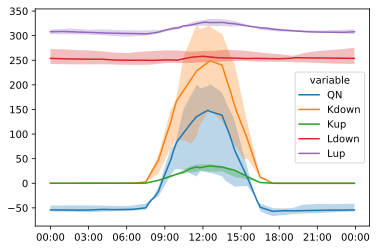

In [38]:
s = '2012 1 31';
e = '2012 2 5' ;  
sp.util.plot_day_clm(df_merge.loc[s:e,['QN', 'Kdown', 'Kup', 'Ldown', 'Lup']]);

In [36]:
#sp.util.plot_day_clm(df_output_rsl.loc[s:e,['U_2']]);

##### Temperature 2 magl

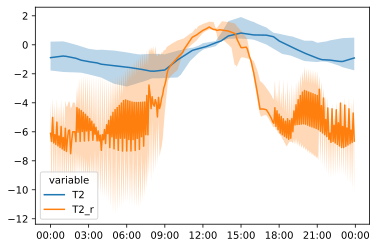

In [28]:
sp.util.plot_day_clm(df_merge.loc[s:e,['T2', 'T2_r']]);

##### Relative Humidity (%)

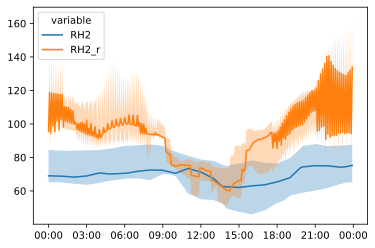

In [29]:
sp.util.plot_day_clm(df_merge.loc[s:e,['RH2', 'RH2_r']]);

##### Specific Humidity (g/kg^-1)

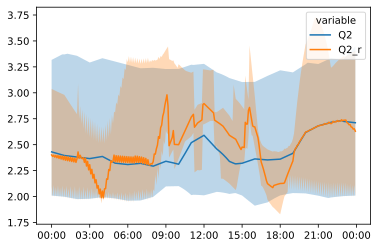

In [30]:
sp.util.plot_day_clm(df_merge.loc[s:e,['Q2', 'Q2_r']]);

##### Friction Velocity

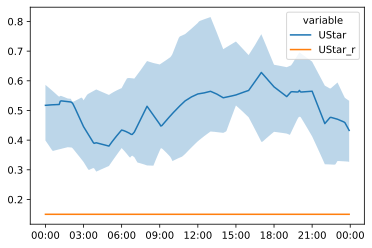

In [32]:
sp.util.plot_day_clm(df_merge.loc[s:e,['UStar', 'UStar_r']]);

##### Resistance

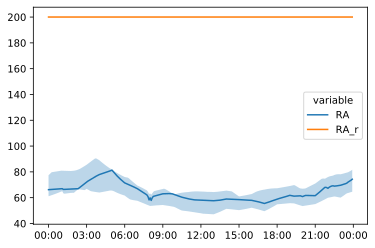

In [33]:
sp.util.plot_day_clm(df_merge.loc[s:e,['RA', 'RA_r']]);

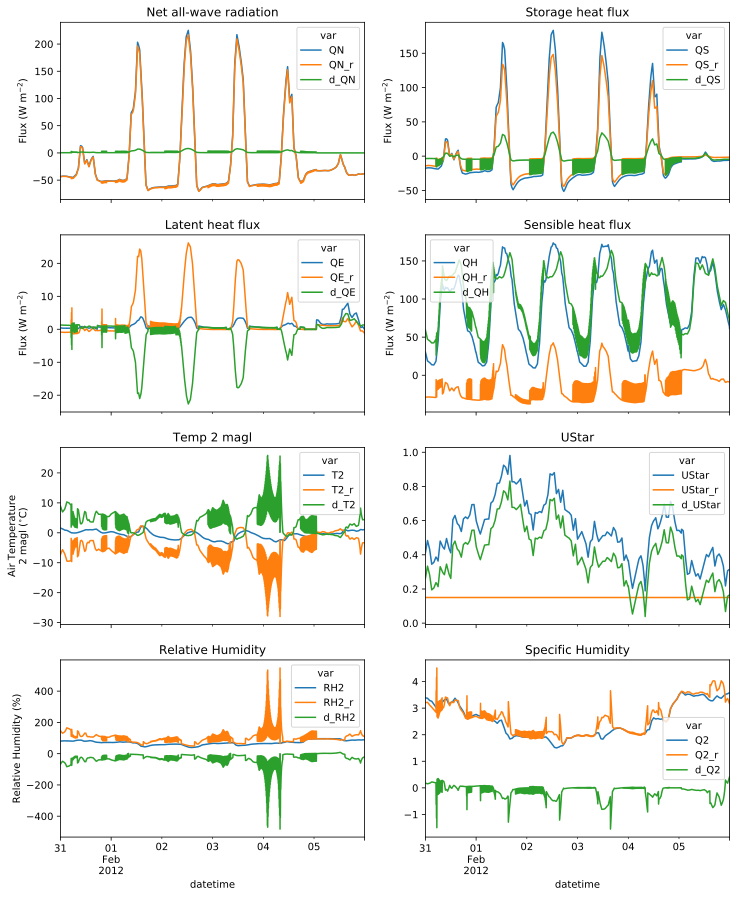

In [39]:
size = (12,15)
fig, axes = plt.subplots(4, 2, sharex=True)

# QN
df_merge.loc[s : e ,['QN','QN_r','d_QN']].plot(ax=axes[0,0],figsize=size,title='Net all-wave radiation',
    )
# QS
df_merge.loc[s : e ,['QS','QS_r','d_QS']].plot(ax=axes[0,1],figsize=size,title='Storage heat flux',
    )
# QE
df_merge.loc[s : e ,['QE','QE_r','d_QE']].plot(ax=axes[1,0],figsize=size,title='Latent heat flux',
    )
# QH
df_merge.loc[s : e ,['QH','QH_r','d_QH']].plot(ax=axes[1,1],figsize=size,title='Sensible heat flux',
    )
# T2
df_merge.loc[s : e ,['T2','T2_r','d_T2']].plot(ax=axes[2,0],figsize=size,title='Temp 2 magl',
    )
# Friction Velocity
df_merge.loc[s : e ,['UStar','UStar_r','d_UStar']].plot(ax=axes[2,1],figsize=size,title='UStar',
    )
# RH
df_merge.loc[s : e ,['RH2','RH2_r','d_RH2']].plot(ax=axes[3,0],figsize=size,title='Relative Humidity',
    )
# RH
df_merge.loc[s : e ,['Q2','Q2_r','d_Q2']].plot(ax=axes[3,1],figsize=size,title='Specific Humidity',
    )
axes[0,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[0,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,0].set_ylabel('Air Temperature\n2 magl ($^{\\circ}}$C)')
axes[3,0].set_ylabel('Relative Humidity (%)');

In [42]:
pd.set_option('display.max_rows', None)

###  Inspect the output for the most extreme day 4th february.
### Large fluctuations in short time, and RH up tp 480%


In [50]:
df_merge.loc['2012 02 04 00:00':'2012 02 04 09:00',['T2_r','d_T2','RH2_r','d_RH2']]

var,T2_r,d_T2,RH2_r,d_RH2
datetime,,,,
2012-02-04 00:00:00,-7.282917,5.419458,97.580300,-32.599685
2012-02-04 00:05:00,-14.773802,12.901090,176.356037,-111.401800
2012-02-04 00:10:00,-5.228239,3.346254,84.060717,-19.132762
2012-02-04 00:15:00,-15.460317,13.569037,186.163789,-121.262017
2012-02-04 00:20:00,-8.026592,6.125998,102.903928,-38.028240
2012-02-04 00:25:00,-16.216734,14.306803,197.724273,-132.874567
2012-02-04 00:30:00,-5.801094,3.881805,87.506364,-22.682536
2012-02-04 00:35:00,-17.051503,15.122833,211.469233,-146.671173
2012-02-04 00:40:00,-8.920194,6.982121,109.824378,-45.051974
